# Catch-Up Lecture

Two items we need to catch up on:
- Active suspension example (in preparation for Lab 2)
- A reasoning as to why $K$ should be positive for Proportional controllers

# Example - Active Suspension for a Car

![Car suspension](car_suspension.png "Car suspension")
source: https://auto.howstuffworks.com/car-suspension.htm


![Car suspension diagram](car-suspension-diagram.png "Car suspension diagram")


![Car suspension free body diagram](car-suspension-free-body-diagram.png "Car suspension free body diagram")

where,
- $F_a$ is the force applied by the active suspension
- $F_g$ is the force due to gravity
- $F_s$ is the force due to the spring
- $F_d$ is the force due to the damper
- $x_c$ is vertical position of car
- $x_g$ is vertical position of the ground

# In Class Activity! 

Determine the transfer function from $F_a$ to $x_c$

Sum forces:
$$
\begin{align*}
\sum_k F_k &= ma \\
-F_s - F_d - F_g + F_a &= ma_c \\
-k(x_c-x_g) - b(\frac{dx_c}{dt}-\frac{dx_g}{dt}) - mg + F_a &= m\frac{d^2x_c}{dt^2}
\end{align*}
$$
Take Laplace transform of both sides:
$$
\begin{align*}
-k(X_c(s) - X_g(s)) - b(sX_c(s) - sX_g(s)) - mg + F_a(s) &= ms^2X_c(s) \\
X_g(s) (k + bs) - mg + F_a(s) &= X_c(s) ( k + bs + ms^2) \\
X_c(s) &= \frac{k+bs}{k + bs + ms^2}X_g(s) + \frac{1}{k + bs + ms^2}F_a(s) - \frac{mg}{k + bs + ms^2}
\end{align*}
$$

# Pause - Linearity
For a linear system, if we double in the input, we will get double the output. Is our current expression for $X_c$ linear with respect to the inputs $F_a$ and $X_g$?

Let's double both inputs and determine the output. Let $\tilde{X}_c$ denote the output with doubled inputs:
$$
\begin{align*}
\tilde{X}_c(s) &= \frac{k+bs}{k + bs + ms^2}2 X_g(s) + \frac{1}{k + bs + ms^2}2 F_a(s) - \frac{mg}{k + bs + ms^2} \\
&= 2X_c(s) + \frac{mg}{k + bs + ms^2}
\end{align*}
$$

We did not get double the output (i.e. we don't have $\tilde{X}_c = 2X_c$)! The term due to gravity is getting in the way! 

# Attempt #2. Write the equations around the equilibrium point (this will absorb the term due to gravity).

In otherwords, re-write the equations so that position is relative to equilibrium instead of absolute position.

At equilibrium we have:
$$
\begin{align*}
x_c &= x_{eq}, \\
\frac{dx_c}{dt} &= 0, \\
\frac{d^2x_c}{dt^2} &= 0, \\
x_g &= 0, \\
\frac{dx_g}{dt} &= 0, \\
F_a &= 0
\end{align*}
$$

# In Class Activity!

Substitute these values into the original expression, and solve for $x_{eq}$.

$$
\begin{align*}
-kx_{eq} - mg &= 0 \\
x_{eq} &= -\frac{mg}{k}
\end{align*}
$$

Now we can express $x_c$ is terms of a relative change from its equilibrium position:
$$
\begin{align*}
x_c(t) = x_{eq} + x_{\Delta}(t)
\end{align*}
$$

Note that the derivatives of $x_c$ can be expressed as:
$$
\begin{align*}
\frac{d x_c(t)}{dt} &= \frac{d x_{\Delta}(t)}{dt} \\
\frac{d^2 x_c(t)}{dt^2} &= \frac{d^2 x_{\Delta}(t)}{dt^2} 
\end{align*}
$$
This is because $x_{eq}$ is a constant (not a function of time)

# In Class Activity!

Substitute $x_c = x_{eq} + x_{\Delta}$ into the original differential equation.

$$
\begin{align*}
-k(x_{eq} + x_{\Delta}-x_g) - b(\frac{dx_{\Delta}}{dt}-\frac{dx_g}{dt}) - mg + F_a = m\frac{d^2x_{\Delta}}{dt^2}
\end{align*}
$$

Recall that $x_{eq} = -\frac{mg}{k}$. Substitute this into the equation:
$$
\begin{align*}
-k(x_{\Delta}-x_g) - b(\frac{dx_{\Delta}}{dt}-\frac{dx_g}{dt}) + F_a = m\frac{d^2x_{\Delta}}{dt^2}
\end{align*}
$$

Take Laplace transform of both sides, and gather terms:
$$
\begin{align*}
(b s + k)X_g(s) + F_a(s) &= (ms^2 + bs + k) X_{\Delta}(s) \\
X_{\Delta}(s) &= \frac{(b s + k)}{(ms^2 + bs + k)}X_g(s) + \frac{1}{(ms^2 + bs + k)}F_a(s)
\end{align*}
$$

This is a transfer function that represents an active suspension system. In Lab 2 you will derive a slightly more complicated model and design 2 different PID controllers for it. 

# Question: Why is $K$ chosen to be positive?

Good question! The answer that I have come up with is not straight-forward, but I think that it is worth looking into this situation because it directly connects to stability and steady state error.

# We can show that for a broad class of systems, $K$ should be positive

Before we start, need to prove a result.

# Proposition 
Consider a transfer function 
$$G(s) = \frac{B(s)}{A(s)} = \frac{b_0 + b_1s + b_2s^2 + \cdots + b_{n_b}s^{n_b}}{a_0 + a_1s + a_2s^2 + \cdots + a_{n_a-1}s^{n_a-1} + s^{n_a}}$$
If $G(s)$ is stable, then $a_0 >0$.

# Proof:
Express $A$ in terms of its roots (these are the poles of $G(s)$):
$$
\begin{align*}
A(s) = (s+p_1)(s+p_2) \cdots (s+p_{n_a})
\end{align*}
$$

From this expression, it is possible to obtain an expression for $a_0$ in terms of the poles:
$$
\begin{align*}
a_0 = p_1p_2 \cdots p_{n_a}
\end{align*}
$$
Because $G(s)$ is assumed to be positive, all $p_{n_a}$ have positive real part. In addition, all complex poles appear in conjugate pairs. This implies that $a_0$ is positive. 
End of Proof

In [1]:
import enel441_utilities as eu
import numpy as np

poles1 = np.array([-1-1j, -1+1j, -2, -3])
poly1 = eu.roots_to_polynomial(poles1)

print('Poles:', poles1)
print('Polynomial:', poly1)

poles2 = np.array([-1-1j, -1+1j, -2+3j, -2-3j, -3])
poly2 = eu.roots_to_polynomial(poles2)

print('\nPoles:', poles2)
print('Polynomial:', poly2)

Poles: [-1.-1.j -1.+1.j -2.+0.j -3.+0.j]
Polynomial: [ 1.  7. 18. 22. 12.]

Poles: [-1.-1.j -1.+1.j -2.+3.j -2.-3.j -3.+0.j]
Polynomial: [  1.   9.  41. 103. 128.  78.]


# Caution!

We did not prove that if $a_0 > 0$, then the system is stable!

In fact, this is not true. Consider the counter-example:

In [2]:
poly3 = np.array([1, 1, 1, 1, 1])
poles3 = np.roots(poly3)

print('Poles:', poles3)
print('Polynomial:', poly3)

Poles: [ 0.30901699+0.95105652j  0.30901699-0.95105652j -0.80901699+0.58778525j
 -0.80901699-0.58778525j]
Polynomial: [1 1 1 1 1]


In order to derive conditions on $a_0$ such that the system is stable, you need to satify the Routh-Hurwitz Stability Criterion.

# Main Result

We want to understand why only considering $K>0$ makes sense. In the following text we will show that under mild assumptions it is reasonable to only consider $K>0$. 

We will make several assumptions:
1. The open-loop system is stable,
2. The closed-loop system is stable,
3. The open-loop system is such that when a positive step input is applied, the steady state output is also positive. 
4. The closed-loop system is such that when a positive step input is applied, the steady state output is also positive. 

For many systems this is reasonable. 

We will use the following notation:
- $r(t)$ is a unit step when we do these calculations.
- $P(s) = \frac{B(s)}{A(s)}$, where 
    - $B(s) = b_0 + b_1s + b_2s^2 + \cdots + b_{n_b}s^{n_b}$,
    - $A(s) = a_0 + a_1s + a_2s^2 + \cdots + a_{n_a-1}s^{n_a-1} + s^{n_a}$,
    - $n_a \ge n_b$,
    - $a_{n_a} \ne 0$, 
    - $b_{n_b} \ne 0$.


The proof of the result follows 
Let's look at the steady state error of the closed-loop system when a step input is applied to the reference input. 


# Step 1.

In this step we are going to prove that given the assumptions, both $a_0$ and $b_0$ are greater than $0$. This is important because in the next step we need to determine the sign of $K$.

Because the open loop system is assumed to be stable, it follows from the Proposition that $a_0>0$. 

Next, we will use the assumptions to show that $b_0$ also is positive. Consider the steady state value of the open-loop response to a unit step input:
$$
\begin{align*}
Y_{ol}(s) &= P(s)U(s) \\
&= \frac{B(s)}{A(s)}\frac{1}{s} \\
&= \frac{b_0 + b_1s + b_2s^2 + \cdots + b_{n_b}s^{n_b}}{a_0 + a_1s + a_2s^2 + \cdots + a_{n_a-1}s^{n_a-1} + s^{n_a}}\frac{1}{s}
\end{align*}
$$
Now find $y_{ol}(\infty)$:
$$
\begin{align*}
y_{ol}(\infty) &= \lim_{s \to 0} s Y(s) \\
&= \lim_{s \to 0} s \frac{b_0 + b_1s + b_2s^2 + \cdots + b_{n_b}s^{n_b}}{a_0 + a_1s + a_2s^2 + \cdots + a_{n_a-1}s^{n_a-1} + s^{n_a}}\frac{1}{s} \\
&= \frac{b_0}{a_0}
\end{align*}
$$
We already know that $a_0 >0$. By the second assumption, $y_{ol}(\infty)$ is positive, thus it follows that $b_0$ must be positive. 

# Step 2.

In this step we will determine ranges of $K$ that correspond to a steady state output that is positive.

Let's determine the steady state value of the closed-loop system when a step input is applied.

$$
\begin{align*}
Y(s) &= \frac{P(s)K}{1 + P(s)K} R(s) \\
&= \frac{P(s)K}{1 + P(s)K}\frac{1}{s} \\
&= \frac{P(s)K}{1 + \frac{B(s)}{A(s)}K} \frac{1}{s} \\
&= \frac{B(s)K}{A(s)+ B(s)K}\frac{1}{s} 
\end{align*}
$$

Now find $y(\infty)$:
$$
\begin{align*}
y(\infty) &= \lim_{s \to 0} s Y(s) \\
&= \lim_{s \to 0} s \frac{B(s)K}{A(s)+ B(s)K}\frac{1}{s}  \\
& = \lim_{s \to 0} \frac{B(s)K}{A(s)+ B(s)K} \\
&= \lim_{s \to 0} \frac{K(b_0 + b_1s + b_2s^2 + \cdots + b_{n_b}s^{n_b})}{a_0 + a_1s + a_2s^2 + \cdots + a_{n_a-1}s^{n_a-1} + s^{n_a} + K(b_0 + b_1s + b_2s^2 + \cdots + b_{n_b}s^{n_b})} \\
&= \frac{Kb_0}{a_0 + Kb_0},
\end{align*}
$$
where $a_0$ and $b_0$ are both positive. 

By the fourth assumption, $y(\infty)$ is positive. In order to determine the range of $K$ for which $y_{\infty}$ is positive, it is helpful to consider the positivity/negativity of the numerator and denominator separately. 
- Case 1: $K<-\frac{a_0}{b_0}$. The numerator is negative, and the denominator is negative, thus $y_{\infty}$ is positive. 
- Case 2: $-\frac{a_0}{b_0} < K < 0$. The numerator is negative, and the denominator is positive, thus $y_{\infty}$ is negative. 
- Case 3: $K > 0$. The numerator is positive, and the denominator is positive, thus $y_{\infty}$ is positive. 

Thus, the values of $K$ of Cases 1 and 3, lead to systems for which the assumptions hold. 

Based on the result so far, we can select values for $K$ that will lead to positive and negative final values:

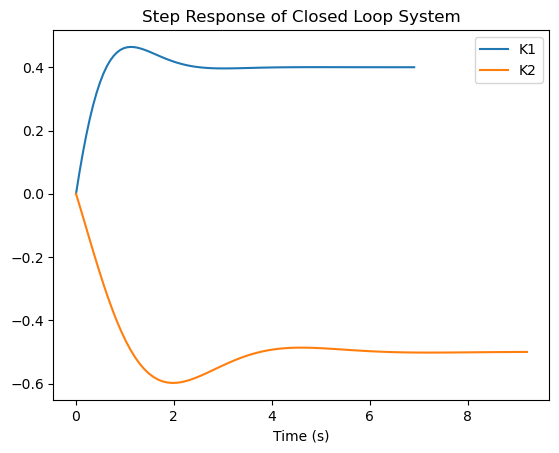

In [10]:
import control as ct
import matplotlib.pyplot as plt

P = ct.tf( [1, 2], [1, 2, 3])

K1 = 1
K2 = -1/2

T1 = K1*P/(1 + K1*P)
T2 = K2*P/(1 + K2*P)

t1,y_step1 = ct.step_response(T1)
t2,y_step2 = ct.step_response(T2)

fig, ax = plt.subplots(1)
ax.plot(t1,y_step1, label='K1')
ax.plot(t2,y_step2, label='K2')
ax.set_title('Step Response of Closed Loop System')
ax.set_xlabel('Time (s)')
ax.legend()

# Step 3.
In this step we will use the stability assumptions to determine a valid range of $K$.  

In Step 2 we have show that the closed loop transfer function from $r$ to $y$ can be expressed as:
$$
\begin{align*}
T(s) = \frac{K(b_0 + b_1s + b_2s^2 + \cdots + b_{n_b}s^{n_b})}{a_0 + a_1s + a_2s^2 + \cdots + a_{n_a-1}s^{n_a-1} + s^{n_a} + K(b_0 + b_1s + b_2s^2 + \cdots + b_{n_b}s^{n_b})}
\end{align*}
$$

By assumption the closed loop system is stable, and so from the Proposition, it follows that $a_0 + Kb_0$ is greater than $0$. 

So we can write the following inequality:
$$
\begin{align*}
a_0 + Kb_0 &> 0 \\
Kb_0 &> -a_0 \\
K &> \frac{-a_0}{b_0}
\end{align*}
$$

# Putting it all together!

Given the assumptions we have shown:
- in Step 2 that when the step response to moves in a positive direction when a positive step is applied that:
$$
\begin{align*}
K < -\frac{a_0}{b_0} 
\end{align*}
$$
or
$$
\begin{align*}
K > 0
\end{align*}
$$
- in Step 3 that when the closed loop system is stable:
$$ 
\begin{align*}
K > \frac{-a_0}{b_0}.
\end{align*}
$$
By combining these two results, we find that given the assumptions, $K>0$. 

QED (which stands for *quod erat demonstrandum* meaning "which was to be demonstrated").